In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ts = pd.read_csv('C:/Users/DELL/Downloads/titanic-passengers.csv', sep=";")
ts.info()
ts=ts.dropna(subset=['Age'])
print(ts["Cabin"].value_counts())
print(ts["Embarked"].value_counts())
ts["Cabin"].fillna("C23 C25 C27 ", inplace = True)
ts["Embarked"].fillna("S", inplace = True)
display(ts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
              ..
B79            1
C91            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 134, dtype: int64
S    554
C    130


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,C23 C25 C27,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,C23 C25 C27,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,C23 C25 C27,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,C23 C25 C27,S
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C23 C25 C27,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C23 C25 C27,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,C23 C25 C27,S


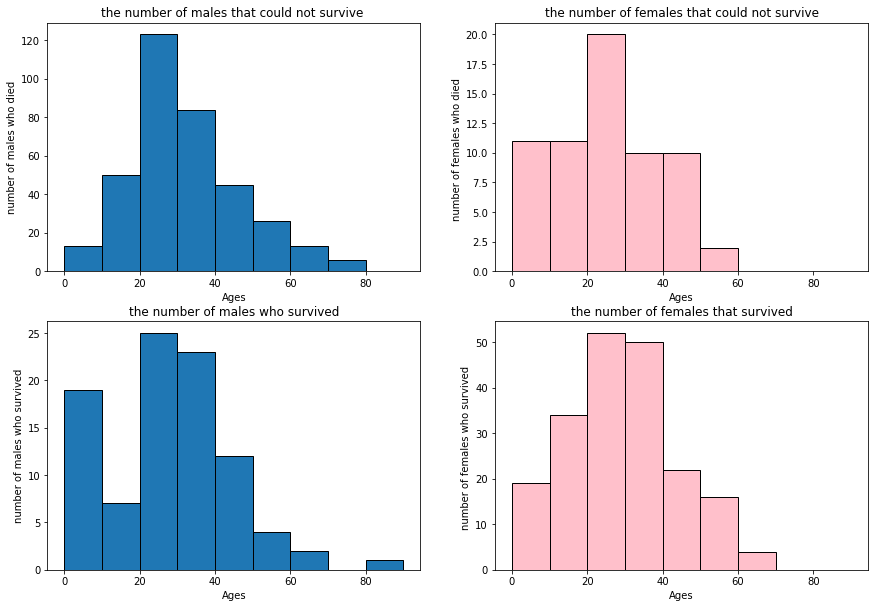

In [5]:
plt.subplots_adjust(left=0.1, bottom=0.1,right=2,top=2)
plt.subplot(2,2,1)
plt.hist(ts.loc[(ts["Sex"] =='male') & (ts["Survived"] =="No")]["Age"],bins =[0,10,20,30,40,50,60,70,80,90],edgecolor = 'black')
plt.title("the number of males that could not survive ")
plt.xlabel('Ages')
plt.ylabel('number of males who died')

plt.subplot(2, 2, 2)
plt.hist(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="No")]["Age"],bins =[0,10,20,30,40,50,60,70,80,90],edgecolor = 'black',color='pink')
plt.title("the number of females that could not survive")
plt.xlabel('Ages')
plt.ylabel('number of females who died ')

plt.subplot(2,2,3)
plt.hist(ts.loc[(ts["Sex"] =='male') & (ts["Survived"] =="Yes")]["Age"],bins =[0,10,20,30,40,50,60,70,80,90],edgecolor = 'black')
plt.title("the number of males who survived")
plt.xlabel('Ages')
plt.ylabel('number of males who survived')

plt.subplot(2,2,4)
plt.hist(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="Yes")]["Age"],bins =[0,10,20,30,40,50,60,70,80,90],edgecolor = 'black',color = 'pink')
plt.title("the number of females that survived")
plt.xlabel('Ages')
plt.ylabel('number of females who survived ')

plt.show()

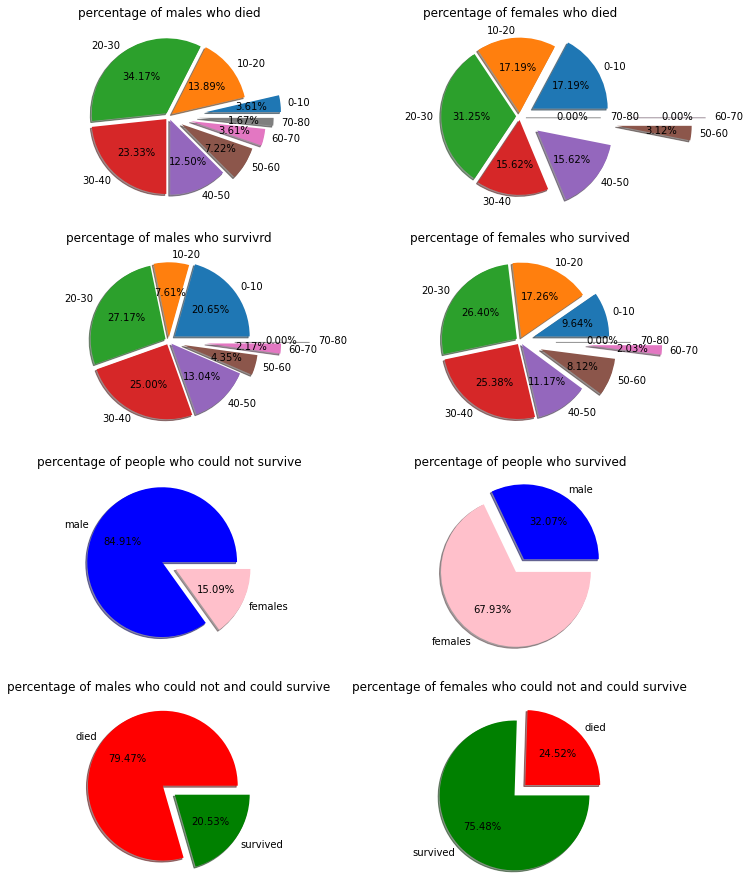

In [6]:
plt.subplots_adjust(left=0.01,bottom=0.01,right=1.5,top=3)
dm = []
df = []
sm = []
sf = []
age_range=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
for i in range (10 , 90 , 10):
    dm.append(len(ts.loc[(ts["Sex"] =='male')& (ts["Survived"] =="No")&(ts["Age"] < i)&(ts["Age"] >= i-10)]))
    df.append(len(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="No")&(ts["Age"] < i)&(ts["Age"] >= i-10)]))
    sm.append(len(ts.loc[(ts["Sex"] =='male')& (ts["Survived"] =="Yes")&(ts["Age"] < i)&(ts["Age"] >= i-10)]))
    sf.append(len(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="Yes")&(ts["Age"] < i)&(ts["Age"] >= i-10)]))
plt.subplot(4,2,1)
plt.title('percentage of males who died')
plt.pie(dm,labels=age_range, shadow=True,explode=(0.5, 0.05, 0.05, 0.05,0.05,0.2,0.3,0.4), autopct='%1.2f%%')
plt.subplot(4,2,2)
plt.title('percentage of females who died')
plt.pie(df,labels=age_range, shadow=True,explode=(0.2,0.05, 0.05,0.05,0.3,1.3,1.5,0.1), autopct='%1.2f%%')
plt.subplot(4,2,3)
plt.title('percentage of males who survivrd')
plt.pie(sm,labels=age_range, shadow=True,explode=(0.1, 0.05, 0.05, 0.05,0.05,0.2,0.5,0.9), autopct='%1.2f%%')
plt.subplot(4,2,4)
plt.title('percentage of females who survived')
plt.pie(sf,labels=age_range, shadow=True,explode=(0.2,0.05, 0.05,0.05,0.05,0.3,0.9,0.5), autopct='%1.2f%%')

colors=['blue','pink']
gender =["male","females"]
survived=["died","survived"]
mycolors=['red','green']

dm.clear()
df.clear()
sm.clear()
sf.clear()

dm.append(len(ts.loc[(ts["Sex"] =='male')& (ts["Survived"] =="No")]))
dm.append(len(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="No")]))
plt.subplot(4,2,5)
plt.title('percentage of people who could not survive')
plt.pie(dm,labels=gender,colors=colors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')

df.append(len(ts.loc[(ts["Sex"] =='male')& (ts["Survived"] =="Yes")]))
df.append(len(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="Yes")]))
plt.subplot(4,2,6)
plt.title('percentage of people who survived')
plt.pie(df,labels=gender,colors=colors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')

sm.append(len(ts.loc[(ts["Sex"] =='male')& (ts["Survived"] =="No")]))
sm.append(len(ts.loc[(ts["Sex"] =='male')& (ts["Survived"] =="Yes")]))
plt.subplot(4,2,7)
plt.title('percentage of males who could not and could survive')
plt.pie(sm,labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')

sf.append(len(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="No")]))
sf.append(len(ts.loc[(ts["Sex"] =='female')& (ts["Survived"] =="Yes")]))
plt.subplot(4,2,8)
plt.title('percentage of females who could not and could survive')
plt.pie(sf,labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.show()

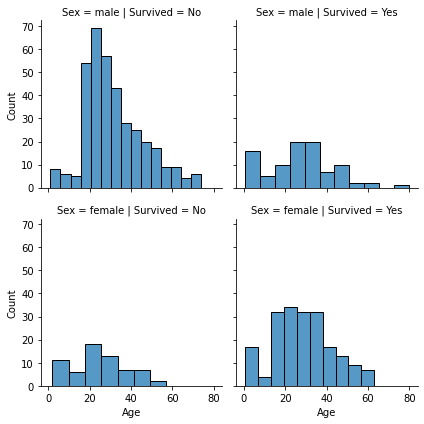

In [244]:
grid = sns.FacetGrid(ts, row="Sex", col="Survived")
grid.map(sns.histplot, "Age")
plt.show()

the impact of Embarked on the survival of the individuals.Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

S    556
C    130
Q     28
Name: Embarked, dtype: int64


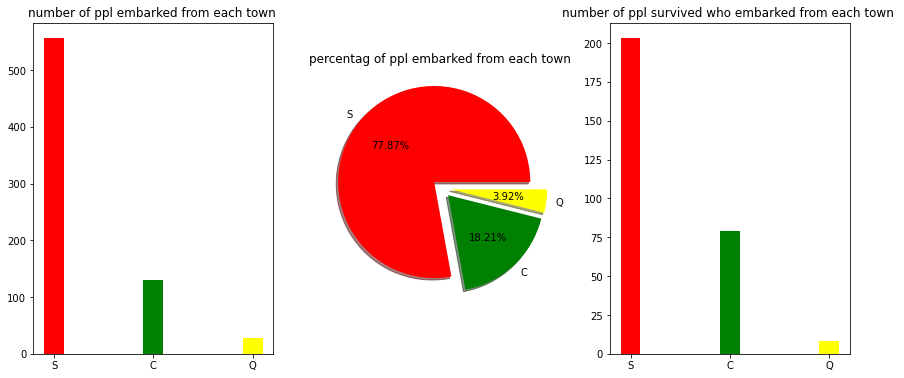

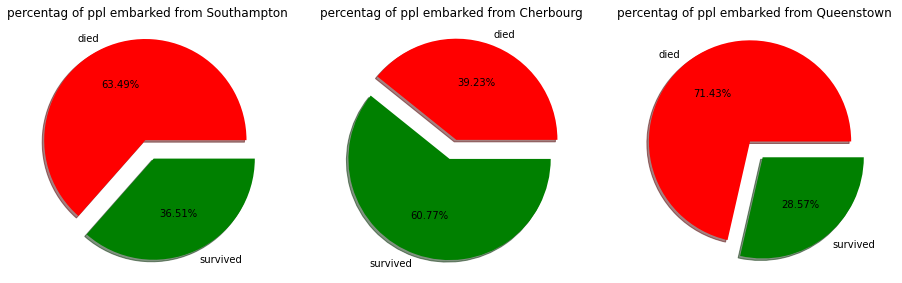

In [9]:
dm.clear()
df.clear()
sm.clear()
sf.clear()
df=['S','C','Q']
color_1=['red','green','yellow']
print(ts["Embarked"].value_counts())
plt.subplots_adjust(left=0.01,bottom=0.05,right=1.9,top=1.2)
dm.append(len(ts.loc[(ts["Embarked"] =='S')]))
dm.append(len(ts.loc[(ts["Embarked"] =='C')]))
dm.append(len(ts.loc[(ts["Embarked"] =='Q')]))
plt.subplot(1,3,1)
plt.title('number of ppl embarked from each town ')
plt.bar(df, dm, color = color_1,  width = 0.2)
dm.clear()
sf.append(len(ts.loc[(ts["Embarked"] =='S')]))
sf.append(len(ts.loc[(ts["Embarked"] =='C')]))
sf.append(len(ts.loc[(ts["Embarked"] =='Q')]))
plt.subplot(1,3,2)
plt.title('percentag of ppl embarked from each town ')
plt.pie(sf,labels=df,colors=color_1, shadow=True,explode=(0.1,0.1,0.1), autopct='%1.2f%%')
dm.append(len(ts.loc[(ts["Embarked"] =='S')&(ts["Survived"] =="Yes")]))
dm.append(len(ts.loc[(ts["Embarked"] =='C')&(ts["Survived"] =="Yes")]))
dm.append(len(ts.loc[(ts["Embarked"] =='Q')&(ts["Survived"] =="Yes")]))
plt.subplot(1,3,3)
plt.title('number of ppl survived who embarked from each town ')
plt.bar(df, dm, color = color_1,  width = 0.2)
plt.show()

plt.subplots_adjust(left=0.01,bottom=0.05,right=2,top=2.2)
sm.append(len(ts.loc[(ts["Embarked"] =='S')& (ts["Survived"] =="No")]))
sm.append(len(ts.loc[(ts["Embarked"] =='C')& (ts["Survived"] =="No")]))
sm.append(len(ts.loc[(ts["Embarked"] =='Q')& (ts["Survived"] =="No")]))
plt.subplot(1,3,1)
plt.title('percentag of ppl embarked from Southampton ')
plt.pie([sm[0],dm[0]],labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.subplot(1,3,2)
plt.title('percentag of ppl embarked from Cherbourg ')
plt.pie([sm[1],dm[1]],labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.subplot(1,3,3)
plt.title('percentag of ppl embarked from Queenstown ')
plt.pie([sm[2],dm[2]],labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.show()

the impact of the class of the survival of the individuals.

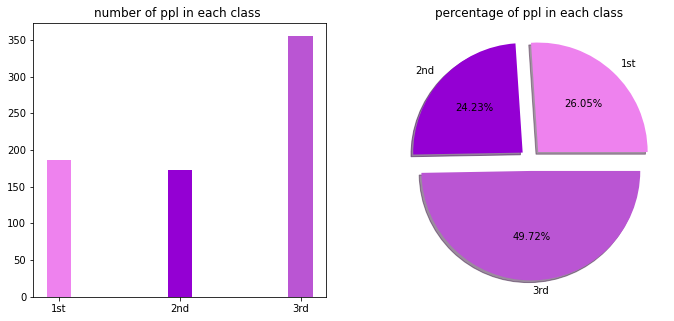

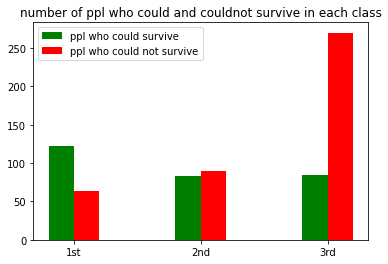

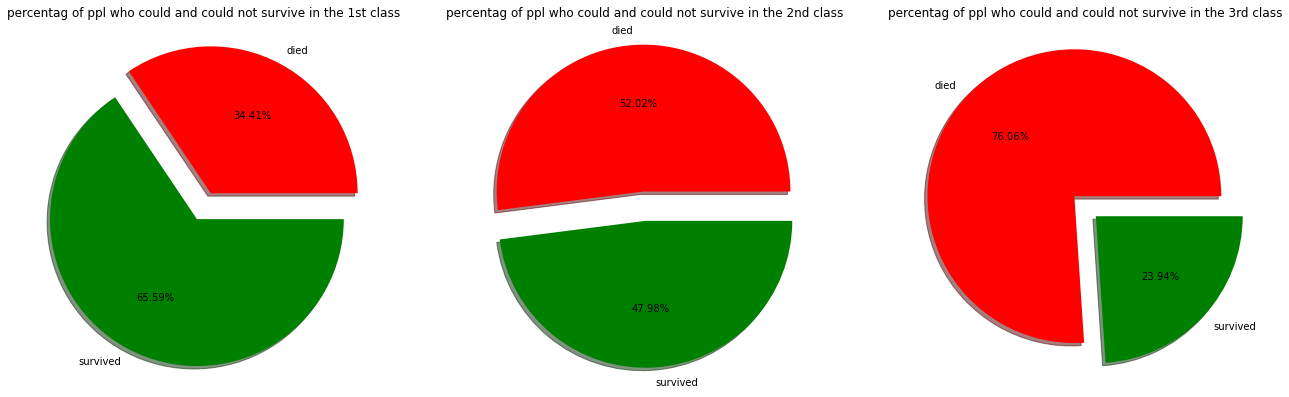

In [50]:
dm.clear()
df.clear()
sm.clear()
sf.clear()
color_1.clear()
df=['1st','2nd','3rd']
color_1=['violet','darkviolet','mediumorchid']
plt.subplots_adjust(left=0.01,bottom=0.05,right=1.5,top=1)

dm.append(len(ts.loc[(ts["Pclass"] == 1)]))
dm.append(len(ts.loc[(ts["Pclass"] == 2)]))
dm.append(len(ts.loc[(ts["Pclass"] == 3)]))

plt.subplot(1,2,1)
plt.title('number of ppl in each class ')
plt.bar(df, dm, color = color_1,  width = 0.2)
plt.subplot(1,2,2)
plt.title('percentage of ppl in each class ')
plt.pie(dm,labels=df,colors=color_1, shadow=True,explode=(0.1,0.1,0.1), autopct='%1.2f%%')

plt.show()

dm.clear()
dm.append(len(ts.loc[(ts["Pclass"] == 1)&(ts["Survived"]=="Yes")]))
dm.append(len(ts.loc[(ts["Pclass"] == 2)&(ts["Survived"]=="Yes")]))
dm.append(len(ts.loc[(ts["Pclass"] == 3)&(ts["Survived"]=="Yes")]))
sm.append(len(ts.loc[(ts["Pclass"] == 1)&(ts["Survived"]=="No")]))
sm.append(len(ts.loc[(ts["Pclass"] == 2)&(ts["Survived"]=="No")]))
sm.append(len(ts.loc[(ts["Pclass"] == 3)&(ts["Survived"]=="No")]))
X_axis = np.arange(len(df))
plt.bar(X_axis - 0.1 , dm, color = 'green',  width = 0.2,label='ppl who could survive')
plt.bar(X_axis + 0.1, sm, color ='red',  width = 0.2,label='ppl who could not survive')
plt.xticks(X_axis, df)
plt.title("number of ppl who could and couldnot survive in each class")
plt.legend()
plt.show()

plt.subplots_adjust(left=0.01,bottom=0.05,right=2.9,top=2.2)
plt.subplot(1,3,1)
plt.title('percentag of ppl who could and could not survive in the 1st class')
plt.pie([sm[0],dm[0]],labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.subplot(1,3,2)
plt.title('percentag of ppl who could and could not survive in the 2nd class')
plt.pie([sm[1],dm[1]],labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.subplot(1,3,3)
plt.title('percentag of ppl who could and could not survive in the 3rd class')
plt.pie([sm[2],dm[2]],labels=survived,colors=mycolors, shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.show()

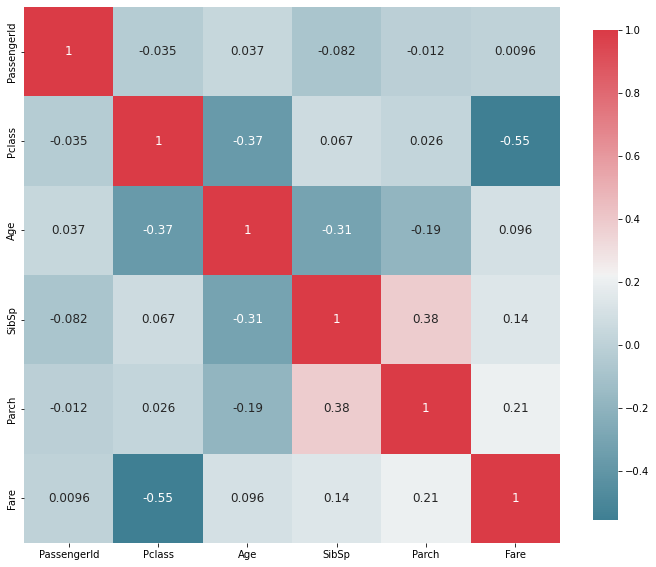

In [53]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( ts )

we can observe that this heatmap is discribing the relation between different items in the dataframe , 1 or a number relatively near 1 means that there is a direct proportional relation between two features , such as the correlation between Parch and SibSp, in opposite the relation betwwen the Fare and the Pclass the larger the fare is, the pclass would be lower in number so there is an inverse relation between those two features, another conclusion that this map only represent numerical data m as it doesnot represent the Sex of the passengers

In [75]:
cleanup={"Survived":{"Yes":1, "No": 0}} 
ts.replace(cleanup, inplace=True)
display(ts[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean())

,Survived
Pclass,
1,0.655914
2,0.479769
3,0.239437


In [296]:
df_0 = ts["Name"].str.split(",",expand=True)
df_1 = df_0[1].str.split(".",n=1,expand=True)
r=pd.concat([ts,df_1],axis=1)
r.rename(columns = {0:'profession',"Name":"Full Name" ,1:'Name'}, inplace = True)
display(r)

,PassengerId,Survived,Pclass,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,profession,Name
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,C23 C25 C27,S,Mr,Erik Gustaf
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,Sigurd Hansen
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,C23 C25 C27,S,Mr,Hans Peder
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,C23 C25 C27,S,Mrs,Nils (Alma Cornelia Berglund)
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Thornton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,C23 C25 C27,S,Rev,Thomas Roussel Davids
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C23 C25 C27,C,Mrs,Nicholas (Adele Achem)
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C23 C25 C27,C,Mr,Orsen
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,C23 C25 C27,S,Miss,Marija


In [297]:
Title_Dictionary = {"profession": {

                    " Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer",

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty",
 
                  " the Countess": "Royalty",
 
                    " Dona":       "Royalty",
 
                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mrs",

                    " Master" :    "Master"

} }

r.replace(Title_Dictionary,inplace=True)
display(r)

,PassengerId,Survived,Pclass,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,profession,Name
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,C23 C25 C27,S,Mrs,Erik Gustaf
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,Sigurd Hansen
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,C23 C25 C27,S,Mrs,Hans Peder
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,C23 C25 C27,S,Mrs,Nils (Alma Cornelia Berglund)
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,Thornton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,C23 C25 C27,S,Officer,Thomas Roussel Davids
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C23 C25 C27,C,Mrs,Nicholas (Adele Achem)
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C23 C25 C27,C,Mrs,Orsen
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,C23 C25 C27,S,Miss,Marija


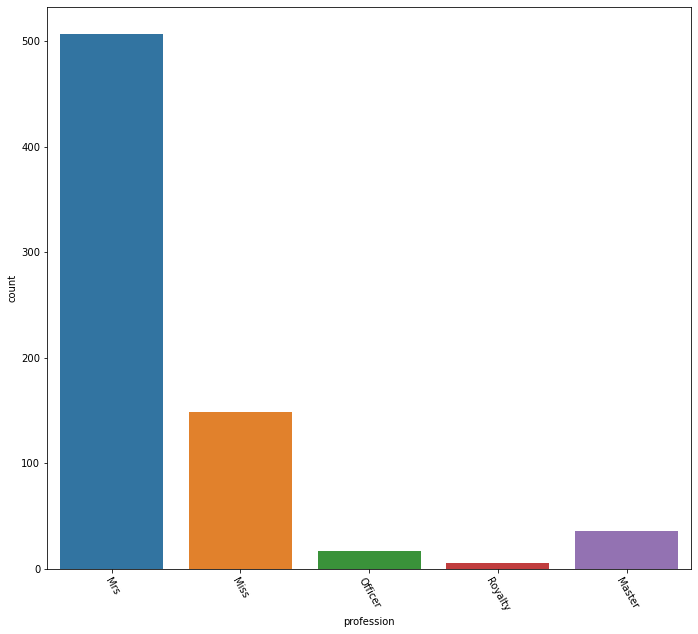

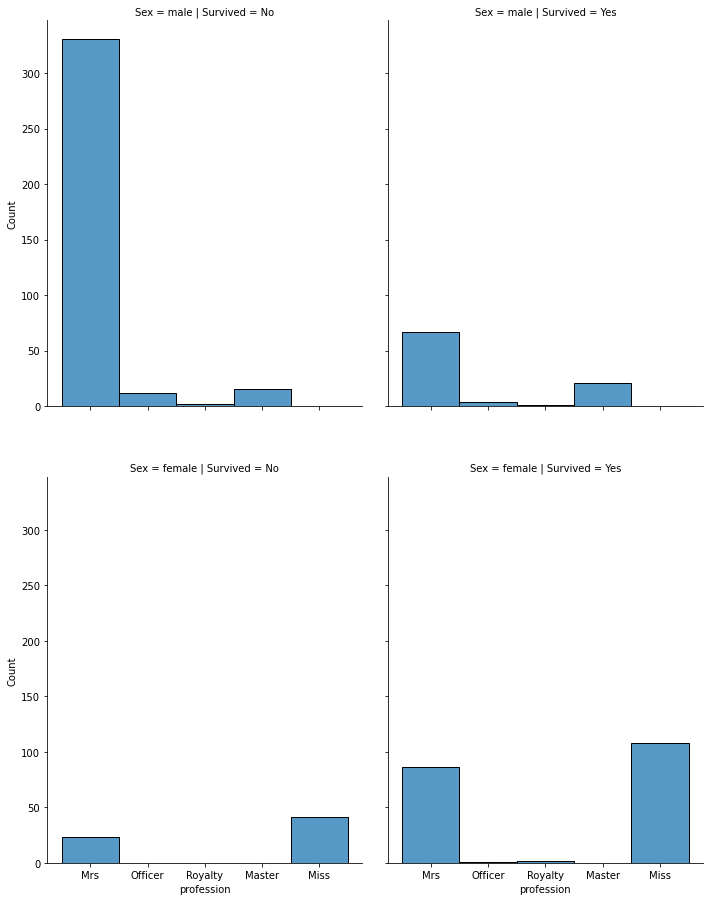

In [301]:
sns.countplot(x ="profession",data=r)
plt.subplots_adjust(left=0.01,bottom=0.05,right=1.5,top=2)
plt.xticks(rotation=-60)
plt.show()
grid = sns.FacetGrid(r, row="Sex", col="Survived")
grid.map(sns.histplot,"profession")
grid.add_legend()
plt.subplots_adjust(left=0.01,bottom=0.05,right=1.5,top=2)
plt.show()

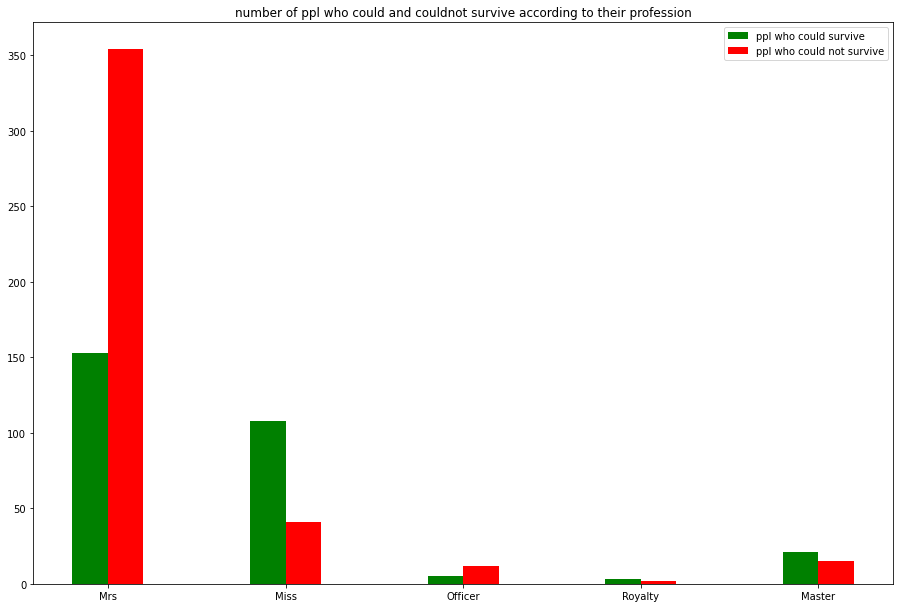

In [310]:
dm.clear()
sm.clear()
sf.clear()
dm.append(len(r.loc[(r["profession"] =='Mrs')&(r["Survived"] =='Yes')]))
dm.append(len(r.loc[(r["profession"] =='Miss')&(r["Survived"] =='Yes')]))
dm.append(len(r.loc[(r["profession"] =='Officer')&(r["Survived"] =='Yes')]))
dm.append(len(r.loc[(r["profession"] =='Royalty')&(r["Survived"] =='Yes')]))
dm.append(len(r.loc[(r["profession"] =='Master')&(r["Survived"] =='Yes')]))

sm.append(len(r.loc[(r["profession"] =='Mrs')&(r["Survived"] =='No')]))
sm.append(len(r.loc[(r["profession"] =='Miss')&(r["Survived"] =='No')]))
sm.append(len(r.loc[(r["profession"] =='Officer')&(r["Survived"] =='No')]))
sm.append(len(r.loc[(r["profession"] =='Royalty')&(r["Survived"] =='No')]))
sm.append(len(r.loc[(r["profession"] =='Master')&(r["Survived"] =='No')]))
sf=['Mrs','Miss','Officer','Royalty','Master']
X_axis = np.arange(len(sf))
plt.subplots_adjust(left=0.01,bottom=0.05,right=2,top=2)
plt.bar(X_axis - 0.1 , dm, color = 'green',  width = 0.2,label='ppl who could survive')
plt.bar(X_axis + 0.1, sm, color ='red',  width = 0.2,label='ppl who could not survive')
plt.xticks(X_axis, sf)
plt.title("number of ppl who could and couldnot survive according to their profession")
plt.legend()
plt.show()


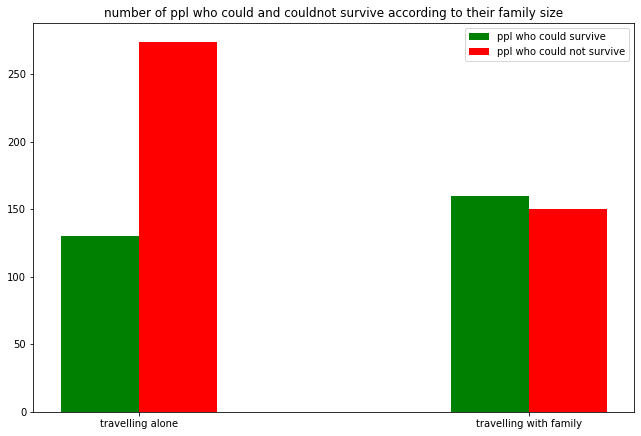

In [318]:
dm.clear()
sm.clear()
sf.clear()
ts['Family Size'] = ts.Parch + ts.SibSp
dm.append(len(ts.loc[(ts["Family Size"] == 0)&(ts["Survived"] =='Yes')]))
dm.append(len(ts.loc[(ts["Family Size"] != 0)&(ts["Survived"] =='Yes')]))
sm.append(len(ts.loc[(ts["Family Size"] == 0)&(ts["Survived"] =='No')]))
sm.append(len(ts.loc[(ts["Family Size"] != 0)&(ts["Survived"] =='No')]))
sf=["travelling alone","travelling with family"]
X_axis = np.arange(len(sf))
plt.subplots_adjust(left=0.01,bottom=0.05,right=1.4,top=1.4)
plt.bar(X_axis - 0.1 , dm, color = 'green',  width = 0.2,label='ppl who could survive')
plt.bar(X_axis + 0.1, sm, color ='red',  width = 0.2,label='ppl who could not survive')
plt.xticks(X_axis, sf)
plt.title("number of ppl who could and couldnot survive according to their family size")
plt.legend()
plt.show()

as a conclusion ppl who travelled alone are likely not to survive in titanic